In [1]:
import os, sys, glob
import math
import numpy as np
import pandas as pd
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('moss_new_filtered.tsv', 'w') as outf:
    outf.write("\t".join(["chrom_pos", "chrom", "pos", "ref", "alt", "qual", "filter", 
                          "tot0", "alt0", "tot1", "alt1", "tot2", "alt2",
                          "tot3", "alt3", "tot4", "alt4", "tot5", "alt5"
                         ]) + "\n")
    with open('moss_new_filtered.vcf') as f:
        CHR_IDX        = 0
        POS_IDX        = 1
        REF_ALLELE_IDX = 3
        ALT_ALLELE_IDX = 4
        QUAL_IDX       = 5
        FILTER_IDX     = 6
        CELL_LINE_IDX  = 15
        TUMOR1_IDX     = 10
        TUMOR2_IDX     = 11
        TUMOR3_IDX     = 12
        TUMOR4_IDX     = 13
        TUMOR5_IDX     = 14
        NORMAL_IDX     = 9
        for idx, line in enumerate(f):
            if line.startswith("#"):
                continue
            else:
                s = line.rstrip("\n").split("\t")
                try:
                    if s[QUAL_IDX] == "-nan":
                        s[QUAL_IDX] = "nan"
                    outf.write("\t".join([s[CHR_IDX] + "_" + s[POS_IDX],
                                          s[CHR_IDX], s[POS_IDX], s[REF_ALLELE_IDX], s[ALT_ALLELE_IDX],
                                          s[QUAL_IDX], s[FILTER_IDX], 
                                          s[CELL_LINE_IDX].split(":")[0], s[CELL_LINE_IDX].split(":")[1],
                                          s[TUMOR1_IDX].split(":")[0], s[TUMOR1_IDX].split(":")[1],
                                          s[TUMOR2_IDX].split(":")[0], s[TUMOR2_IDX].split(":")[1],
                                          s[TUMOR3_IDX].split(":")[0], s[TUMOR3_IDX].split(":")[1],
                                          s[TUMOR4_IDX].split(":")[0], s[TUMOR4_IDX].split(":")[1],
                                          s[TUMOR5_IDX].split(":")[0], s[TUMOR5_IDX].split(":")[1]
                                         ]) + "\n")
                except IndexError:
                    print(idx+1)

In [4]:
df = pd.read_csv("moss_new_filtered.tsv", sep="\t")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
len(df)

384864

In [6]:
df.head()

,chrom_pos,chrom,pos,ref,alt,qual,filter,tot0,alt0,tot1,alt1,tot2,alt2,tot3,alt3,tot4,alt4,tot5,alt5
0,1_13183,1,13183,T,G,3989.5000,PASS,52,11,43,9,42,10,44,8,49,11,43,10
1,1_29013,1,29013,G,T,4514.5700,PASS,23,6,17,5,33,16,18,8,19,10,32,15
2,1_35013,1,35013,T,A,164.6050,PASS,59,0,49,2,46,3,45,2,49,2,44,1
3,1_35540,1,35540,A,T,18677.4000,PASS,41,36,34,26,56,49,39,34,44,36,41,30
4,1_78717,1,78717,T,G,33.8803,PASS,28,0,28,0,35,0,42,0,25,0,40,3


In [7]:
len(df[df["filter"] == "PASS"])

384864

In [8]:
df_pass = df[df["filter"] == "PASS"]

In [28]:
len(df)

384864

In [27]:
len(df_pass)

384864

In [29]:
df_pass.head()

,vaf0,vaf1,vaf2,vaf3,vaf4,vaf5
chrom_pos,,,,,,
1_13183,0.211538,0.209302,0.238095,0.181818,0.224490,0.232558
1_29013,0.260870,0.294118,0.484848,0.444444,0.526316,0.468750
1_35013,0.000000,0.040816,0.065217,0.044444,0.040816,0.022727
1_35540,0.878049,0.764706,0.875000,0.871795,0.818182,0.731707
1_78717,0.000000,0.000000,0.000000,0.000000,0.000000,0.075000


In [9]:
for i in range(6):
    df_pass["vaf%d" % i] = df_pass["alt%d" % i] / df_pass["tot%d" % i]

In [10]:
df_pass = df_pass.set_index("chrom_pos")

In [11]:
df_pass = df_pass[["vaf%d" % i for i in range(6)]]

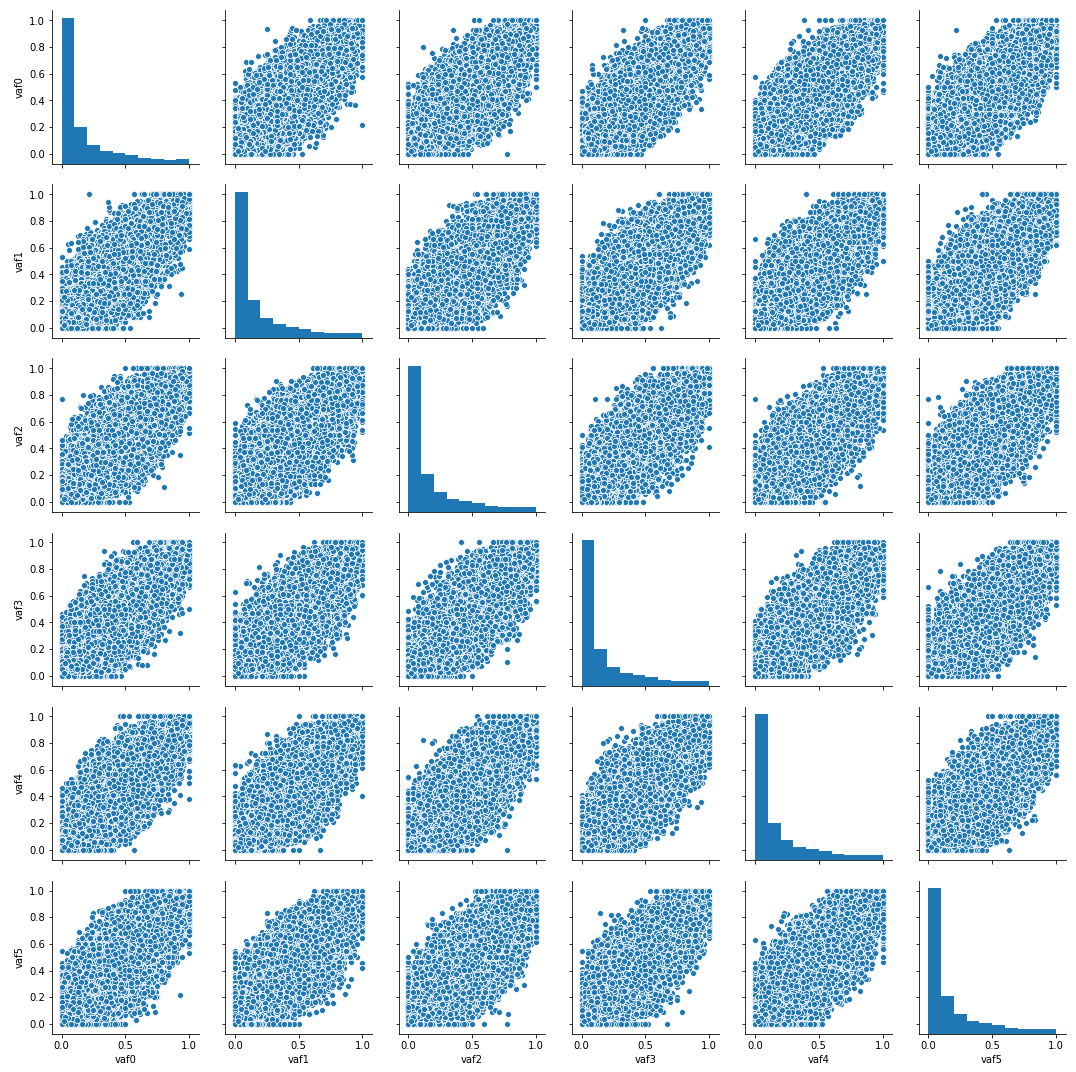

In [13]:
sns.pairplot(df_pass)
plt.savefig("scatter.pdf")

In [12]:
unique = [ {} for i in range(6) ] 

In [13]:
threshold = 0.05
unique[0] = list(df_pass[(df_pass["vaf0"] > threshold) & (df_pass["vaf1"] == 0)
                         & (df_pass["vaf2"] == 0) & (df_pass["vaf3"] == 0)
                         & (df_pass["vaf4"] == 0) & (df_pass["vaf5"] == 0)].index)
unique[1] = list(df_pass[(df_pass["vaf1"] > threshold) & (df_pass["vaf0"] == 0)
                         & (df_pass["vaf2"] == 0) & (df_pass["vaf3"] == 0)
                         & (df_pass["vaf4"] == 0) & (df_pass["vaf5"] == 0)].index)
unique[2] = list(df_pass[(df_pass["vaf2"] > threshold) & (df_pass["vaf1"] == 0)
                         & (df_pass["vaf0"] == 0) & (df_pass["vaf3"] == 0)
                         & (df_pass["vaf4"] == 0) & (df_pass["vaf5"] == 0)].index)
unique[3] = list(df_pass[(df_pass["vaf3"] > threshold) & (df_pass["vaf1"] == 0)
                         & (df_pass["vaf2"] == 0) & (df_pass["vaf0"] == 0)
                         & (df_pass["vaf4"] == 0) & (df_pass["vaf5"] == 0)].index)
unique[4] = list(df_pass[(df_pass["vaf4"] > threshold) & (df_pass["vaf1"] == 0)
                         & (df_pass["vaf2"] == 0) & (df_pass["vaf3"] == 0)
                         & (df_pass["vaf0"] == 0) & (df_pass["vaf5"] == 0)].index)
unique[5] = list(df_pass[(df_pass["vaf5"] > threshold) & (df_pass["vaf1"] == 0)
                         & (df_pass["vaf2"] == 0) & (df_pass["vaf3"] == 0)
                         & (df_pass["vaf4"] == 0) & (df_pass["vaf0"] == 0)].index)

In [14]:
presence = [ None for i in range(6) ]
presence[0] = list(df_pass[(df_pass["vaf0"]> 0)].index)
presence[1] = list(df_pass[(df_pass["vaf1"]> 0)].index)
presence[2] = list(df_pass[(df_pass["vaf2"]> 0)].index)
presence[3] = list(df_pass[(df_pass["vaf3"]> 0)].index)
presence[4] = list(df_pass[(df_pass["vaf4"]> 0)].index)
presence[5] = list(df_pass[(df_pass["vaf5"]> 0)].index)

In [15]:
len(unique[0])

718

In [19]:
# does the cell line result from a single-cell colony? so polyclonal origin possible?
# is this male/female?

In [21]:
import venn

In [22]:
labels=venn.get_labels(presence, fill=['number', 'logic'])

In [23]:
labels

{'000001': '000001: 1475',
 '000010': '000010: 1268',
 '000011': '000011: 1083',
 '000100': '000100: 1676',
 '000101': '000101: 1177',
 '000110': '000110: 1267',
 '000111': '000111: 1644',
 '001000': '001000: 1958',
 '001001': '001001: 1324',
 '001010': '001010: 1497',
 '001011': '001011: 1739',
 '001100': '001100: 1652',
 '001101': '001101: 1881',
 '001110': '001110: 2231',
 '001111': '001111: 3383',
 '010000': '010000: 1637',
 '010001': '010001: 1086',
 '010010': '010010: 1309',
 '010011': '010011: 1466',
 '010100': '010100: 1407',
 '010101': '010101: 1552',
 '010110': '010110: 1819',
 '010111': '010111: 2686',
 '011000': '011000: 1591',
 '011001': '011001: 1567',
 '011010': '011010: 1918',
 '011011': '011011: 2976',
 '011100': '011100: 2059',
 '011101': '011101: 2930',
 '011110': '011110: 3698',
 '011111': '011111: 9060',
 '100000': '100000: 1446',
 '100001': '100001: 1201',
 '100010': '100010: 1255',
 '100011': '100011: 1670',
 '100100': '100100: 1382',
 '100101': '100101: 1662',
 

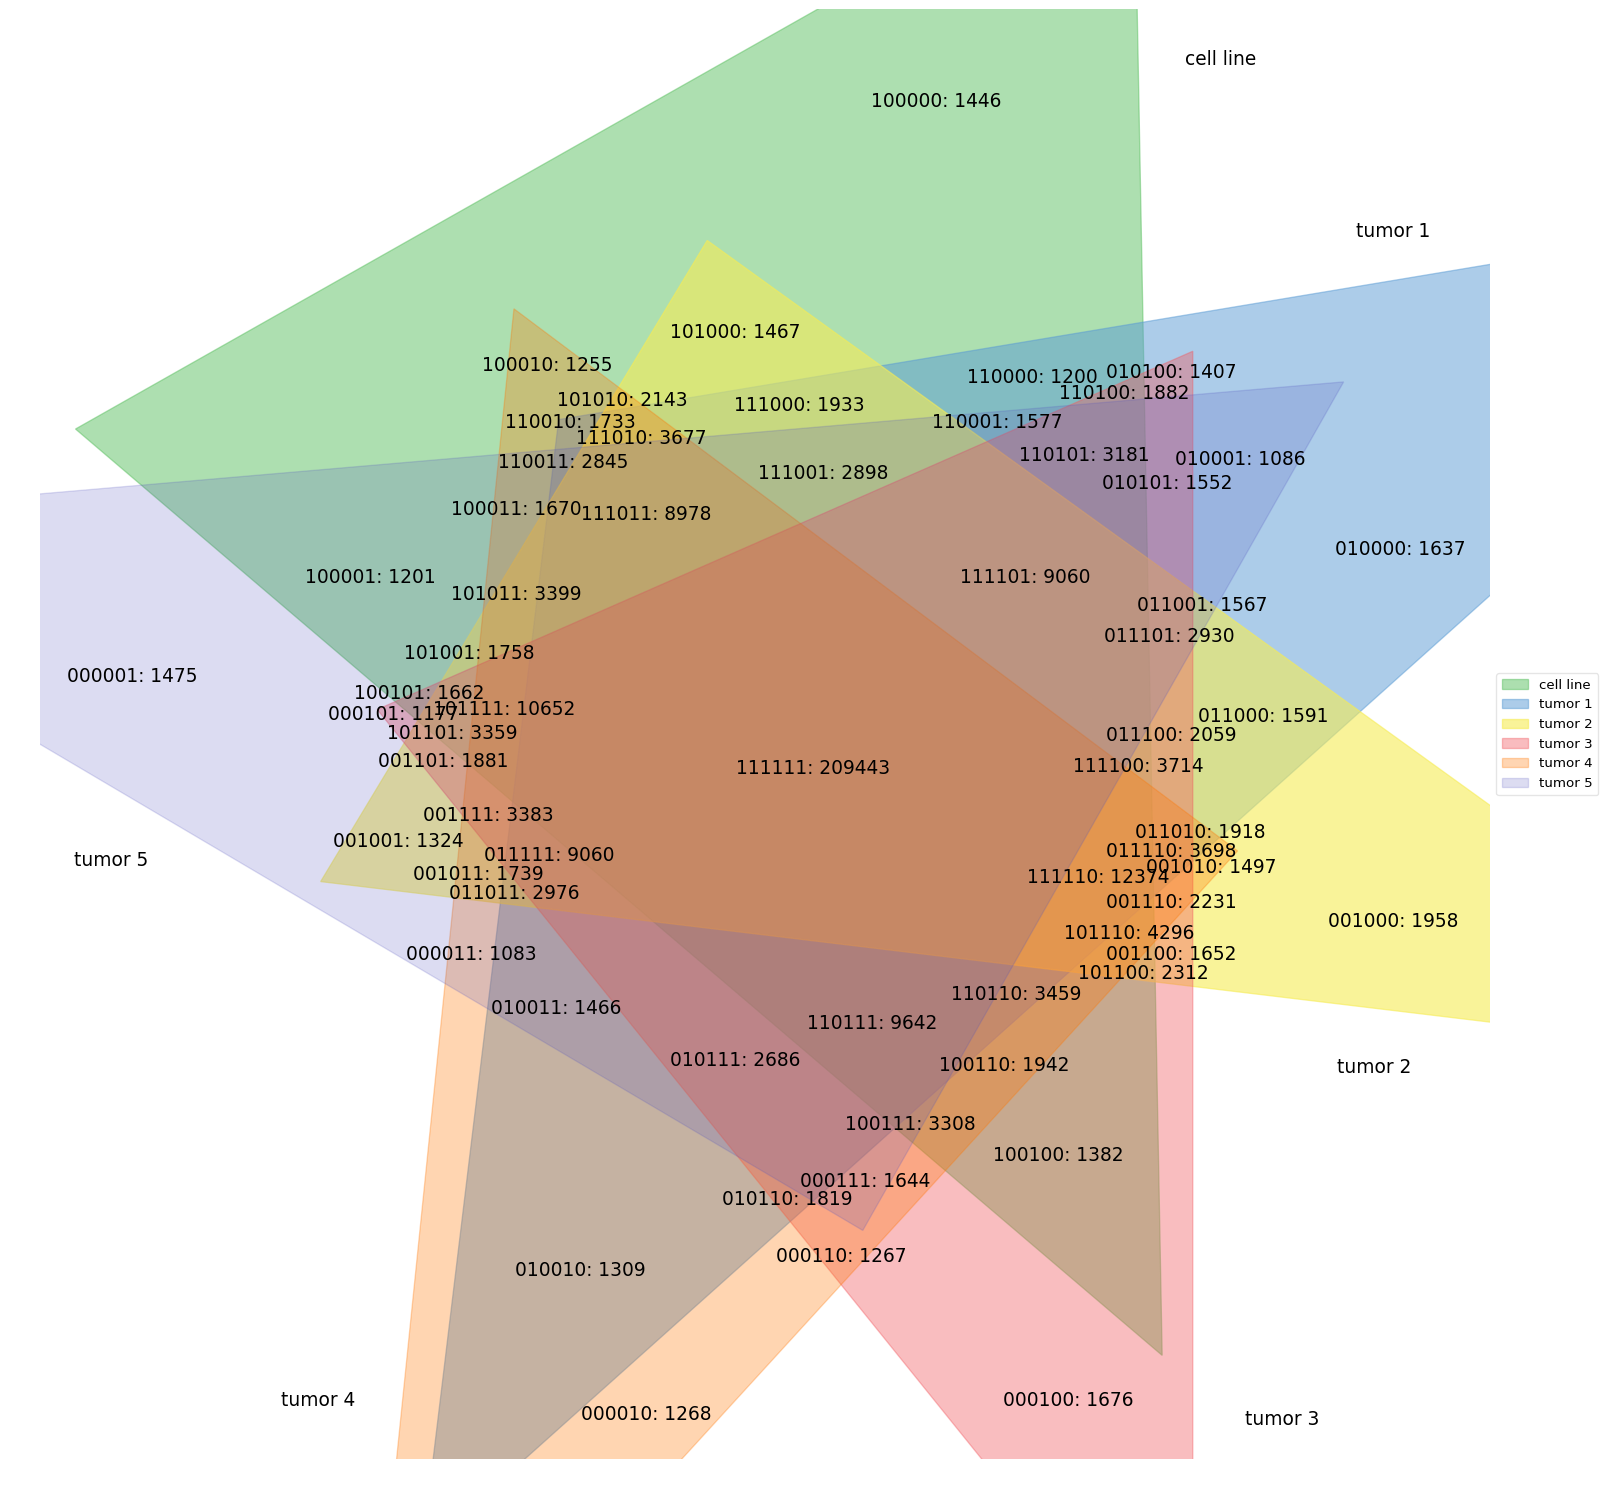

In [23]:
fig, ax = venn.venn6(labels, 
                     names=['cell line', 'tumor 1', 'tumor 2', 'tumor 3', 'tumor 4', 'tumor 5'])
plt.savefig("venn.pdf")

In [24]:
?venn.venn3

In [25]:
for i in range(6): print(i, len(presence[i]), len(unique[i]))

0 320848 718
1 316357 868
2 322927 1023
3 321790 849
4 319860 631
5 311662 832


In [26]:
len(df_pass)

384864